In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [1]:
1111

1111

In [34]:
df = pd.read_csv('sale_tasks_dataset.csv', decimal='.')

In [35]:
df.dtypes

customer_id                     int64
age                            object
gender_cd                      object
region_size                    object
foreign_flg                   float64
entrepreneur_flg              float64
auto_flg                      float64
traveler_flg                  float64
partnership_flg               float64
child_amt                     float64
realty_type                    object
segment_cd                     object
bundle_nm                      object
confirmed_income              float64
predicted_income              float64
product_cd                     object
functional_cd                  object
finish_dttm                    object
state_talk_time_sec           float64
wo_hit_status_result_desc      object
wo_hit_status_reason_desc      object
employee_id                   float64
emp_age                         int64
emp_gender_cd                  object
emp_children_cnt              float64
emp_work_months_cnt             int64
emp_citizens

In [19]:
df.isna().sum() # количество nan

customer_id                       0
age                             182
gender_cd                       258
region_size                    7289
foreign_flg                    7289
entrepreneur_flg               7289
auto_flg                       7289
traveler_flg                   7289
partnership_flg                7289
child_amt                      7289
realty_type                    7289
segment_cd                     7289
bundle_nm                     13988
confirmed_income              17284
predicted_income              14604
product_cd                        0
functional_cd                     0
finish_dttm                       0
state_talk_time_sec             148
wo_hit_status_result_desc         0
wo_hit_status_reason_desc         0
employee_id                       0
emp_age                           0
emp_gender_cd                  2180
emp_children_cnt              18605
emp_work_months_cnt               0
emp_citizenship_country_cd    12487
emp_marital_status_cd       

In [20]:
df.isna().sum() / df.shape[0] # процент nan

customer_id                   0.000000
age                           0.009737
gender_cd                     0.013803
region_size                   0.389974
foreign_flg                   0.389974
entrepreneur_flg              0.389974
auto_flg                      0.389974
traveler_flg                  0.389974
partnership_flg               0.389974
child_amt                     0.389974
realty_type                   0.389974
segment_cd                    0.389974
bundle_nm                     0.748382
confirmed_income              0.924723
predicted_income              0.781339
product_cd                    0.000000
functional_cd                 0.000000
finish_dttm                   0.000000
state_talk_time_sec           0.007918
wo_hit_status_result_desc     0.000000
wo_hit_status_reason_desc     0.000000
employee_id                   0.000000
emp_age                       0.000000
emp_gender_cd                 0.116634
emp_children_cnt              0.995399
emp_work_months_cnt      

Заметим одинаковое количество пропусков от region_size до segment_cd

In [21]:
df[df['region_size'].isna()].isna().sum()

customer_id                      0
age                            148
gender_cd                      188
region_size                   7289
foreign_flg                   7289
entrepreneur_flg              7289
auto_flg                      7289
traveler_flg                  7289
partnership_flg               7289
child_amt                     7289
realty_type                   7289
segment_cd                    7289
bundle_nm                     6688
confirmed_income              7094
predicted_income              6437
product_cd                       0
functional_cd                    0
finish_dttm                      0
state_talk_time_sec             48
wo_hit_status_result_desc        0
wo_hit_status_reason_desc        0
employee_id                      0
emp_age                          0
emp_gender_cd                 1020
emp_children_cnt              7275
emp_work_months_cnt              0
emp_citizenship_country_cd    5029
emp_marital_status_cd         5963
dtype: int64

Они связаны, очищаем по region_size

In [22]:
df.dropna(subset=['region_size', 'gender_cd'], inplace=True)

In [23]:
df.isna().sum()

customer_id                       0
age                              17
gender_cd                         0
region_size                       0
foreign_flg                       0
entrepreneur_flg                  0
auto_flg                          0
traveler_flg                      0
partnership_flg                   0
child_amt                         0
realty_type                       0
segment_cd                        0
bundle_nm                      7243
confirmed_income              10121
predicted_income               8100
product_cd                        0
functional_cd                     0
finish_dttm                       0
state_talk_time_sec              97
wo_hit_status_result_desc         0
wo_hit_status_reason_desc         0
employee_id                       0
emp_age                           0
emp_gender_cd                  1148
emp_children_cnt              11260
emp_work_months_cnt               0
emp_citizenship_country_cd     7404
emp_marital_status_cd       

In [24]:
df.finish_dttm = pd.to_datetime(df.finish_dttm,
                                     format='%Y-%m-%d %H:%M:%S')
df['flg'] = df['confirmed_income'].apply(lambda x: 1 if x > 0 else 0)

In [25]:
df

,customer_id,age,gender_cd,region_size,foreign_flg,entrepreneur_flg,auto_flg,traveler_flg,partnership_flg,child_amt,...,wo_hit_status_result_desc,wo_hit_status_reason_desc,employee_id,emp_age,emp_gender_cd,emp_children_cnt,emp_work_months_cnt,emp_citizenship_country_cd,emp_marital_status_cd,flg
1,348648289,44.0,M,rural,0.0,0.0,0.0,0.0,1.0,1.0,...,"Дозвон, Отказ",Другое,7004.0,36,W,NaN,2,RUS,NaN,0
2,345496995,23.0,F,town,0.0,0.0,1.0,0.0,1.0,0.0,...,"Дозвон, Успешно",Назначена встреча,80760.0,52,W,NaN,6,NaN,NaN,0
3,182783192,34.0,M,town,0.0,0.0,0.0,0.0,0.0,0.0,...,"Дозвон, Успешно",Обещал утилизироваться самостоятельно,158672.0,22,NaN,NaN,8,NaN,NaN,0
5,64946855,31.0,M,town,0.0,0.0,0.0,0.0,1.0,0.0,...,"Дозвон, Отказ",Отказ прослушать предложение,184241.0,43,W,NaN,6,RUS,UNM,0
6,516320897,34.0,F,town,0.0,0.0,0.0,0.0,1.0,0.0,...,"Дозвон, Отказ",Страхуется в своей СК,106508.0,74,M,NaN,1,RUS,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18684,476301003,42.0,M,rural,0.0,0.0,1.0,0.0,1.0,0.0,...,"Дозвон, Отказ",Не устраивает одобренная сумма,200908.0,33,W,NaN,2,RUS,UNM,1
18686,365712573,49.0,F,urban,0.0,1.0,0.0,0.0,1.0,3.0,...,"Дозвон, Отказ",Не устраивает одобренная сумма,191799.0,47,W,NaN,2,NaN,NaN,0
18687,305526568,58.0,F,msk,0.0,0.0,0.0,0.0,0.0,0.0,...,"Дозвон, Отказ",Кредитная карта не нужна,265923.0,53,W,NaN,6,NaN,NaN,0
18688,77876991,47.0,M,urban,0.0,1.0,1.0,1.0,1.0,1.0,...,"Дозвон, Отказ",Кредит уже не нужен,215719.0,29,M,NaN,4,NaN,NaN,0


In [27]:
df.dtypes

customer_id                            int64
age                                   object
gender_cd                             object
region_size                           object
foreign_flg                          float64
entrepreneur_flg                     float64
auto_flg                             float64
traveler_flg                         float64
partnership_flg                      float64
child_amt                            float64
realty_type                           object
segment_cd                            object
bundle_nm                             object
confirmed_income                     float64
predicted_income                     float64
product_cd                            object
functional_cd                         object
finish_dttm                   datetime64[ns]
state_talk_time_sec                  float64
wo_hit_status_result_desc             object
wo_hit_status_reason_desc             object
employee_id                          float64
emp_age   

<Axes: ylabel='age'>

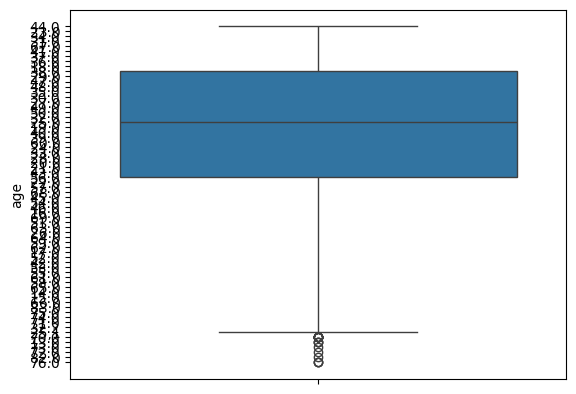

In [ ]:
sns.boxplot(data=df, y='age')